In [5]:
# imports for exploratory dataframe manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# imports for exploratory data analysis
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score

In [1]:
import os
import cv2
from sklearn.model_selection import train_test_split

In [8]:
def get_img_paths(base_dir, ignore_filetypes=['.txt']):
    """
    Inputs:
        base_dir (string/ os.path type) relative path to the directory with folders containing images
        *kwargs
        ignore_filetypes (list of strings) filetypes to exclude from output
        type_foldes (dictionary) folders that identify different filetypes and add identifiers to add to output
    Returns:
        paths (list of tuples) relative paths to files with identifiers
    """
    absent_paths = []
    present_paths = []

    for root, dirs, files in os.walk(base_dir):
        # remove undesired files
        if ignore_filetypes:
            # check each file
            for file in files:
                for file_type in ignore_filetypes:
                    if file_type in file:
                        files.remove(file)
        if files:
            for file in files:
                full_path = os.path.join(root, file)

                if 'NO' in full_path:
                    absent_paths.append((full_path, 0))

                elif 'YES' in full_path:
                    present_paths.append((full_path, 1))

    #         if type_folders:
    #             for key, value in type_folders.items():
    #                 if key in root:

    #         print('root: ', root)
    #         print('files: ', files[:5], len(files))
    #         print('paths: ', paths)
#     absent_paths.extend(present_paths)
    return absent_paths, present_paths

In [3]:
basedir = "D:\MRI_data\Kaggle" 
absent, present = get_img_paths(basedir)

In [4]:
len(absent + present)

3531

## Train Test Split Data

In [6]:
# define train size for data set
# split before combining datasets
train_size = 0.8 # eighty percent
test_size = 0.15 # fifteen percent
val_size = 0.05 # five percent

# calculate test size for second split
test_size2 = test_size/(1-train_size)

# split absent paths into train and test
absent_train, absent_test = train_test_split(absent, train_size=train_size)

# split absent test paths into test and validation
absent_test, absent_val = train_test_split(absent_test, train_size=test_size2)

# split present paths into train and test
present_train, present_test = train_test_split(present, train_size=train_size)

# split present paths into test and val
present_test, present_val = train_test_split(present_test, train_size=test_size2)

In [7]:
print(f'''
Tumor Training Data: {len(present_train)}\n
Tumor Testing Data: {len(present_test)}\n
Tumor Validation Data: {len(present_val)}
''')


Tumor Training Data: 2335

Tumor Testing Data: 438

Tumor Validation Data: 146



In [58]:
len(absent_test)

92

In [59]:
len(absent_train)

489

In [60]:
len(absent_val)

31

In [9]:
# combnine train and test and val (respectively)
train = absent_train
train.extend(present_train)

test = absent_test
test.extend(present_test)

val = absent_val
val.extend(present_val)

In [64]:
len(test)

530

In [72]:
val[0]

('D:\\MRI_data\\Kaggle\\simple_yes_no\\NO\\horizontal_section\\No15.jpg', 0)

In [10]:
def get_data(input_data, img_size=150):
    """
    This function takes an image type and classification with matching index and returns  image data with classification

    Input:
        x (list of path like entries) paths leading to image data to be loaded
        y (list of classification) list of classifications matching index of x data

    Returns:
        data (np.array) image data with classification
    """

    data = []

    for i in range(len(input_data)):
        path = input_data[i][0]
        class_num = input_data[i][1]

        #         for img in os.listdir(path):

        try:
            img_arr = cv2.imread(path)
            resized_arr = cv2.resize(img_arr, (img_size, img_size))  # Reshaping images to preferred size
            data.append([resized_arr, class_num])

        except Exception as e:
            print(e)

    return np.array(data)

# load data 

In [11]:
train_img_data = get_data(train)
len(train_img_data)

OpenCV(4.0.1) C:\ci\opencv-suite_1573470242804\work\modules\imgproc\src\resize.cpp:3784: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'

OpenCV(4.0.1) C:\ci\opencv-suite_1573470242804\work\modules\imgproc\src\resize.cpp:3784: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'

OpenCV(4.0.1) C:\ci\opencv-suite_1573470242804\work\modules\imgproc\src\resize.cpp:3784: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'

OpenCV(4.0.1) C:\ci\opencv-suite_1573470242804\work\modules\imgproc\src\resize.cpp:3784: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'

OpenCV(4.0.1) C:\ci\opencv-suite_1573470242804\work\modules\imgproc\src\resize.cpp:3784: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'

OpenCV(4.0.1) C:\ci\opencv-suite_1573470242804\work\modules\imgproc\src\resize.cpp:3784: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'

OpenCV(4.0.1) C:\ci\opencv-suite_1

2813

In [76]:
len(train)

2824

In [19]:
train_img_data[0][0]

array([[[253, 253, 253],
        [251, 251, 251],
        [250, 250, 250],
        ...,
        [253, 253, 253],
        [254, 254, 254],
        [254, 254, 254]],

       [[248, 248, 248],
        [252, 252, 252],
        [246, 246, 246],
        ...,
        [248, 248, 248],
        [244, 244, 244],
        [251, 251, 251]],

       [[248, 248, 248],
        [233, 233, 233],
        [126, 126, 126],
        ...,
        [140, 140, 140],
        [245, 245, 245],
        [255, 255, 255]],

       ...,

       [[247, 247, 247],
        [215, 215, 215],
        [142, 142, 142],
        ...,
        [123, 123, 123],
        [220, 220, 220],
        [252, 252, 252]],

       [[252, 252, 252],
        [246, 246, 246],
        [219, 219, 219],
        ...,
        [240, 240, 240],
        [254, 254, 254],
        [254, 254, 254]],

       [[255, 255, 255],
        [254, 254, 254],
        [248, 248, 248],
        ...,
        [251, 251, 251],
        [254, 254, 254],
        [254, 254, 254]]

In [12]:
test_img_data = get_data(test)
len(test_img_data)

OpenCV(4.0.1) C:\ci\opencv-suite_1573470242804\work\modules\imgproc\src\resize.cpp:3784: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'

OpenCV(4.0.1) C:\ci\opencv-suite_1573470242804\work\modules\imgproc\src\resize.cpp:3784: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'

OpenCV(4.0.1) C:\ci\opencv-suite_1573470242804\work\modules\imgproc\src\resize.cpp:3784: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'



527

In [26]:
testimg_df = pd.DataFrame(test_img_data, columns=['Image_Data', 'Classification'])

In [27]:
testimg_df.shape

(527, 2)

In [28]:
testimg_df.head()

,Image_Data,Classification
0,"[[[37, 37, 37], [37, 37, 37], [37, 37, 37], [3...",0
1,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",0
2,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",0
3,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",0
4,"[[[1, 1, 1], [1, 1, 1], [1, 1, 1], [1, 1, 1], ...",0


In [30]:
testimg_df.drop_duplicates(inplace=True)

TypeError: unhashable type: 'numpy.ndarray'

In [94]:
len(test)

530

In [93]:
val_img_data = get_data(val)
len(val_img_data)

177

In [95]:
len(val)

177

In [14]:
labels = ['Tumor Absent', 'Tumor Present']

(-0.5, 149.5, 149.5, -0.5)

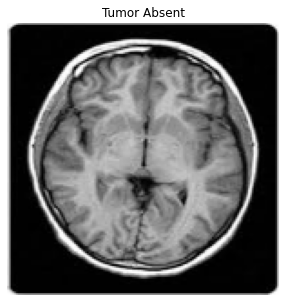

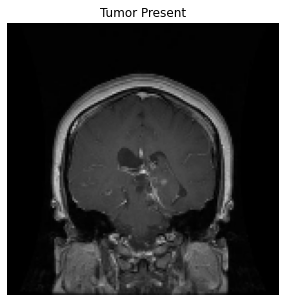

In [15]:
# plot image data from first [1] train image data (tumor-free brain)
plt.figure(figsize=(5,5))
plt.imshow(train_img_data[0][0], cmap='gray')
plt.title(labels[train_img_data[0][1]])
plt.axis('off')

# plot image data from last [-1] train image data (tumor patient brain)
plt.figure(figsize=(5,5))
plt.imshow(train_img_data[-1][0], cmap='gray')
plt.title(labels[train_img_data[-1][1]])
plt.axis('off')

In [103]:
# separate image data and identifiers
x_train = []
y_train = []

x_val = []
y_val = []

x_test = []
y_test = []

for data, label in train_img_data:
    x_train.append(data)
    y_train.append(label)
    
for data, label in val_img_data:
    x_val.append(data)
    y_val.append(label)
    
for data, label in test_img_data:
    x_test.append(data)
    y_test.append(label)

In [104]:
# scale data and convert to np.array for efficiency

x_train = np.array(x_train)/255

x_test = np.array(x_test)/255

x_val = np.array(x_val)/255

In [105]:
img_size = 150
# resize data for deep learning
x_train = x_train.reshape(-1, img_size, img_size, 3)

x_test = x_test.reshape(-1, img_size, img_size, 3)

x_val = x_val.reshape(-1, img_size, img_size, 3)

# DATAGEN

Alter data to make model more robust

In [106]:
from keras.preprocessing.image import ImageDataGenerator

In [107]:
datagen = ImageDataGenerator(\
                            featurewise_center=False,
                            samplewise_center=False,
                            featurewise_std_normalization=False,
                            samplewise_std_normalization=False, 
                            zca_whitening=False, 
                            rotation_range=30,
                            zoom_range=0.25,
                            width_shift_range=0.2,
                            height_shift_range=0.2,
                            horizontal_flip=True,
                            vertical_flip=False)

# FSM

In [108]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization

In [109]:
model = Sequential()
model.add(Conv2D(32, (3,3), strides=1, padding='same', activation='relu', input_shape=(150,150,3)))
model.add(Flatten())
model.add(Dense(units=1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['Precision'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 32)      896       
_________________________________________________________________
flatten (Flatten)            (None, 720000)            0         
_________________________________________________________________
dense (Dense)                (None, 1)                 720001    
Total params: 720,897
Trainable params: 720,897
Non-trainable params: 0
_________________________________________________________________


In [111]:
from keras.callbacks import ReduceLROnPlateau

In [112]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience=2, verbose=1, factor=0.3, min_lr=10**-9)

# Run Model

In [114]:
history = model.fit(datagen.flow(x_train, y_train), epochs=12, validation_data=datagen.flow(x_val, y_val), callbacks=[learning_rate_reduction])

Epoch 1/12
88/88 [==============================] - 31s 358ms/step - loss: 0.6724 - precision: 0.8320 - val_loss: 0.4905 - val_precision: 0.8276
Epoch 2/12
88/88 [==============================] - 29s 332ms/step - loss: 0.4097 - precision: 0.8449 - val_loss: 0.4161 - val_precision: 0.8363
Epoch 3/12
88/88 [==============================] - 31s 353ms/step - loss: 0.3883 - precision: 0.8557 - val_loss: 0.4154 - val_precision: 0.8466
Epoch 4/12
88/88 [==============================] - 31s 355ms/step - loss: 0.3683 - precision: 0.8624 - val_loss: 0.3907 - val_precision: 0.8616
Epoch 5/12
88/88 [==============================] - 30s 338ms/step - loss: 0.3654 - precision: 0.8637 - val_loss: 0.4250 - val_precision: 0.8608
Epoch 6/12
88/88 [==============================] - 38s 431ms/step - loss: 0.3680 - precision: 0.8666 - val_loss: 0.4066 - val_precision: 0.8993
Epoch 7/12
88/88 [==============================] - 29s 334ms/step - loss: 0.3603 - precision: 0.8683 - val_loss: 0.3849 - val_pre

In [129]:
y_test = np.array(y_test, dtype=np.uint8)

In [130]:
model.evaluate(x_test, y_test)

17/17 [==============================] - 1s 57ms/step - loss: 0.2829 - precision: 0.9069


[0.28292205929756165, 0.9069263935089111]

In [131]:
len(y_test)

527

In [132]:
len(y_val)

177

# Get paths to image files 
## (updated)

In [11]:
# imports from kaggle example https://www.kaggle.com/kmader/show-3d-nifti-images
# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# import os
import skimage
from skimage.morphology import ball, disk, dilation, binary_erosion, remove_small_objects, erosion, closing, reconstruction, binary_closing
from skimage.measure import label,regionprops, perimeter
from skimage.morphology import binary_dilation, binary_opening
from skimage.filters import roberts, sobel
from skimage import measure, feature
from skimage.segmentation import clear_border
from skimage import data
from scipy import ndimage as ndi
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import scipy.misc
from glob import glob
from skimage.io import imread

# Create .gif from fdata

## Define Functions

### Define function to create list of folder names within a given directory

In [24]:
def get_dir_folders(directory):
    '''
    Input: list-like directory containing the folder names / file names within a given parent folder
    Returns: list clean_directory containing only folder names within the parent folder
    '''
    # create list copy of directory
    clean_directory = list(directory)
    
    # iterate through directory
    for name in directory:
        
        # remove all names with file extensions
        print('path: ', name)
        
        filename = name.split('/')[-1]
        
        if '.' in filename:
            print(f'remove {name} from list')
            directory.remove(name)
            
    return clean_directory
            
#         # remove all names with file extensions
#         print('path: ', name)
#         print('name[-4]', name[-4])
#         if '.' == name[-4]:
#             print(f'remove {name} from list')
#             clean_directory.remove(name)
            
#         elif '.' in name[-6:]:
#             print(f'remove {name} from list')
#             clean_directory.remove(name)
            
#         elif 'txt' in name:
#             print(f'remove {name} from list')
#             clean_directory.remove(name)
            
#         elif 'tar' in name:
#             print(f'remove {name} from list')
#             clean_directory.remove(name)
            


### Define function to load image file(s) given folder path

In [25]:
def get_img_paths(parent_folder, in_name='*'):
    
    return glob(os.path.join([folder for folder in image_folder if in_name in folder][0], '*'))


### Define function to create .gif given image data

In [26]:
# define function to create gif from image data
def create_gif(input_image, title='Scan .gif', filename='scan.gif'):
    # create .gif-like https://matplotlib.org/gallery/animation/dynamic_image2.html
    import imageio
    import matplotlib.animation as animate

    images = []
    input_image_data = input_image.get_fdata()

    fig = plt.figure()

    for i in range(len(input_image_data)):
        im = plt.imshow(input_image_data[i], animated=True)
        images.append([im])

    ani = animate.ArtistAnimation(fig, images, interval=25, blit=True, repeat_delay=500)

    plt.title(title, fontsize=20)
    ani.save(filename)
    plt.show()

## Load Brain Development Data Paths (Healthy Brains)

In [27]:
# get paths to data
# base path for data sourced from brain-development.org
bd_base_path = os.path.join('D:\MRI_data\BrainDevelopmentOrg')

# # base path for data sourced from Kaggle.com
# k_base_path = os.path.join('../data/MRI_data/Kaggle')

# # kaggle simple data path
# simple_yn_k_path = os.path.join(k_base_path, 'simple_yes_no')

# # kaggle advanced classification path\
# adv_class_k_path = os.path.join(k_base_path, 'classification_images')

In [28]:
bd_directory = glob(os.path.join(bd_base_path, '*'))
# bd_directory.append('.txt')

In [29]:
bd_directory

['D:\\MRI_data\\BrainDevelopmentOrg\\Demographics',
 'D:\\MRI_data\\BrainDevelopmentOrg\\DTI_images',
 'D:\\MRI_data\\BrainDevelopmentOrg\\IXI-MRA.tar',
 'D:\\MRI_data\\BrainDevelopmentOrg\\IXI-PD.tar',
 'D:\\MRI_data\\BrainDevelopmentOrg\\IXI-T1.tar',
 'D:\\MRI_data\\BrainDevelopmentOrg\\IXI-T2.tar',
 'D:\\MRI_data\\BrainDevelopmentOrg\\MRA_images',
 'D:\\MRI_data\\BrainDevelopmentOrg\\PD_images',
 'D:\\MRI_data\\BrainDevelopmentOrg\\REAME_BrainDev.txt',
 'D:\\MRI_data\\BrainDevelopmentOrg\\T1_images',
 'D:\\MRI_data\\BrainDevelopmentOrg\\T2_images']

In [30]:
# get list of all folders in directory
# get copy of full directory
bd_image_folders = get_dir_folders(bd_directory)
bd_image_folders

path:  D:\MRI_data\BrainDevelopmentOrg\Demographics
path:  D:\MRI_data\BrainDevelopmentOrg\DTI_images
path:  D:\MRI_data\BrainDevelopmentOrg\IXI-MRA.tar
remove D:\MRI_data\BrainDevelopmentOrg\IXI-MRA.tar from list
path:  D:\MRI_data\BrainDevelopmentOrg\IXI-T1.tar
remove D:\MRI_data\BrainDevelopmentOrg\IXI-T1.tar from list
path:  D:\MRI_data\BrainDevelopmentOrg\MRA_images
path:  D:\MRI_data\BrainDevelopmentOrg\PD_images
path:  D:\MRI_data\BrainDevelopmentOrg\REAME_BrainDev.txt
remove D:\MRI_data\BrainDevelopmentOrg\REAME_BrainDev.txt from list
path:  D:\MRI_data\BrainDevelopmentOrg\T2_images


['D:\\MRI_data\\BrainDevelopmentOrg\\Demographics',
 'D:\\MRI_data\\BrainDevelopmentOrg\\DTI_images',
 'D:\\MRI_data\\BrainDevelopmentOrg\\IXI-MRA.tar',
 'D:\\MRI_data\\BrainDevelopmentOrg\\IXI-PD.tar',
 'D:\\MRI_data\\BrainDevelopmentOrg\\IXI-T1.tar',
 'D:\\MRI_data\\BrainDevelopmentOrg\\IXI-T2.tar',
 'D:\\MRI_data\\BrainDevelopmentOrg\\MRA_images',
 'D:\\MRI_data\\BrainDevelopmentOrg\\PD_images',
 'D:\\MRI_data\\BrainDevelopmentOrg\\REAME_BrainDev.txt',
 'D:\\MRI_data\\BrainDevelopmentOrg\\T1_images',
 'D:\\MRI_data\\BrainDevelopmentOrg\\T2_images']

In [18]:
bd_image_folders = [folder for folder in bd_image_folders if 'image' in folder]

In [19]:
bd_image_folders

['D:\\MRI_data\\BrainDevelopmentOrg\\DTI_images',
 'D:\\MRI_data\\BrainDevelopmentOrg\\MRA_images',
 'D:\\MRI_data\\BrainDevelopmentOrg\\PD_images',
 'D:\\MRI_data\\BrainDevelopmentOrg\\T1_images',
 'D:\\MRI_data\\BrainDevelopmentOrg\\T2_images']

## Get Paths to Various Scan Types

### Get T1 Path

In [20]:
bd_image_files_T1 = glob(os.path.join([folder for folder in bd_image_folders if 'T1_' in folder][0], '*'))
print(len(bd_image_files_T1))
bd_image_files_T1[:5]

581


['D:\\MRI_data\\BrainDevelopmentOrg\\T1_images\\IXI002-Guys-0828-T1.nii.gz',
 'D:\\MRI_data\\BrainDevelopmentOrg\\T1_images\\IXI012-HH-1211-T1.nii.gz',
 'D:\\MRI_data\\BrainDevelopmentOrg\\T1_images\\IXI013-HH-1212-T1.nii.gz',
 'D:\\MRI_data\\BrainDevelopmentOrg\\T1_images\\IXI014-HH-1236-T1.nii.gz',
 'D:\\MRI_data\\BrainDevelopmentOrg\\T1_images\\IXI015-HH-1258-T1.nii.gz']

### Get T2 Path

In [21]:
bd_image_files_T2 = glob(os.path.join(str([folder for folder in bd_image_folders if 'T2_' in folder][0]), '*'))
print(len(bd_image_files_T2))
bd_image_files_T2[:5]

578


['D:\\MRI_data\\BrainDevelopmentOrg\\T2_images\\IXI002-Guys-0828-T2.nii.gz',
 'D:\\MRI_data\\BrainDevelopmentOrg\\T2_images\\IXI012-HH-1211-T2.nii.gz',
 'D:\\MRI_data\\BrainDevelopmentOrg\\T2_images\\IXI013-HH-1212-T2.nii.gz',
 'D:\\MRI_data\\BrainDevelopmentOrg\\T2_images\\IXI014-HH-1236-T2.nii.gz',
 'D:\\MRI_data\\BrainDevelopmentOrg\\T2_images\\IXI015-HH-1258-T2.nii.gz']

### Get MRA Path

In [22]:
bd_image_files_MRA = glob(os.path.join(str([folder for folder in bd_image_folders if 'MRA_' in folder][0]), '*'))
print(len(bd_image_files_MRA))
bd_image_files_MRA[:5]

570


['D:\\MRI_data\\BrainDevelopmentOrg\\MRA_images\\IXI002-Guys-0828-MRA.nii.gz',
 'D:\\MRI_data\\BrainDevelopmentOrg\\MRA_images\\IXI012-HH-1211-MRA.nii.gz',
 'D:\\MRI_data\\BrainDevelopmentOrg\\MRA_images\\IXI013-HH-1212-MRA.nii.gz',
 'D:\\MRI_data\\BrainDevelopmentOrg\\MRA_images\\IXI015-HH-1258-MRA.nii.gz',
 'D:\\MRI_data\\BrainDevelopmentOrg\\MRA_images\\IXI016-Guys-0697-MRA.nii.gz']

### Get PD Path

In [23]:
bd_image_files_PD = glob(os.path.join(str([folder for folder in bd_image_folders if 'PD_' in folder][0]), '*'))
print(len(bd_image_files_PD))
bd_image_files_PD[:5]

578


['D:\\MRI_data\\BrainDevelopmentOrg\\PD_images\\IXI002-Guys-0828-PD.nii.gz',
 'D:\\MRI_data\\BrainDevelopmentOrg\\PD_images\\IXI012-HH-1211-PD.nii.gz',
 'D:\\MRI_data\\BrainDevelopmentOrg\\PD_images\\IXI013-HH-1212-PD.nii.gz',
 'D:\\MRI_data\\BrainDevelopmentOrg\\PD_images\\IXI014-HH-1236-PD.nii.gz',
 'D:\\MRI_data\\BrainDevelopmentOrg\\PD_images\\IXI015-HH-1258-PD.nii.gz']

## Load Image Data From File

### Load a T1 Image

In [24]:
img_T1 = nib.load(bd_image_files_T1[500])
img_T1

In [25]:
img_T1.get_fdata().shape

(256, 256, 150)

### Load a T2 Image

In [26]:
# load specified image
img_T2 = nib.load(bd_image_files_T2[17])
img_T2

In [27]:
img_T2.shape

(256, 256, 130)

In [28]:
img_T2.get_fdata().shape

(256, 256, 130)

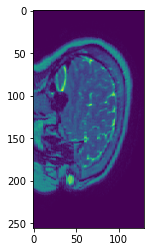

In [29]:
T2_image = img_T2.get_fdata()
# test_mask = 
fig, ax = plt.subplots()
ax.imshow(T2_image[80]//2)

### Load an MRA image

In [30]:
img_MRA = nib.load(bd_image_files_MRA[17])
img_MRA

In [31]:
img_MRA.get_fdata().shape

(512, 512, 100)

### Load a PD IMAGE

In [32]:
img_PD = nib.load(bd_image_files_PD[17])
img_PD

In [34]:
img_PD.get_fdata().shape

(256, 256, 130)

## Create Images for EDA/ understanding Data

#### Create T1 image

MovieWriter ffmpeg unavailable; using Pillow instead.


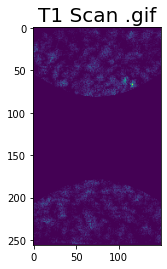

In [35]:
create_gif(img_T1, title="T1 Scan .gif", filename="T1_MRI.gif")

MovieWriter ffmpeg unavailable; using Pillow instead.


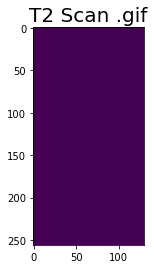

In [36]:
create_gif(img_T2, title='T2 Scan .gif', filename='T2_MRI.gif')

MovieWriter ffmpeg unavailable; using Pillow instead.


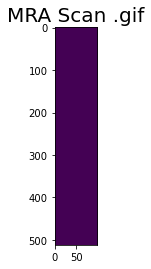

In [32]:
create_gif(img_MRA, title='MRA Scan .gif', filename='MRA_MRI.gif')

MovieWriter ffmpeg unavailable; using Pillow instead.


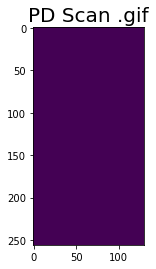

In [36]:
create_gif(img_PD, title='PD Scan .gif', filename='PD_MRI.gif')